# Interpretation of Compression Models

## Curating and Visualizing Reconstruction Loss

**Gregory Way 2018**

Compiling results of the z dimensionality sweep across algorithms and datasets.

The data was generated first by running the script [2.ensemble-z-analysis/analysis.sh](https://github.com/greenelab/BioBombe/blob/master/2.ensemble-z-analysis/analysis.sh) as follows:

```bash
bash 2.ensemble-z-analysis/analysis.sh
```

## Structure:

The notebook first curates all of the reconstruction loss results across datasets and outputs them in long format.
Next, the results are visualized in a series of figures describing reconstruction loss.

## Output:

1. Curated reconstruction results across datasets in long matrix format.
2. Reconstruction loss figures across algorithms and dimensions.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

In [2]:
# Load helper functions
source(file.path("scripts", "util.R"))

## TARGET Reconstruction Results

In [3]:
# Define the dataset to compile results for
dataset <- 'TARGET'
base_dir <- file.path("figures", dataset)

target_recon_cost_df <- compile_reconstruction_data(dataset)
recon_file <- file.path("results", paste0("reconstruction_", dataset, ".tsv"))

# Write results to file
readr::write_tsv(target_recon_cost_df, path = recon_file)

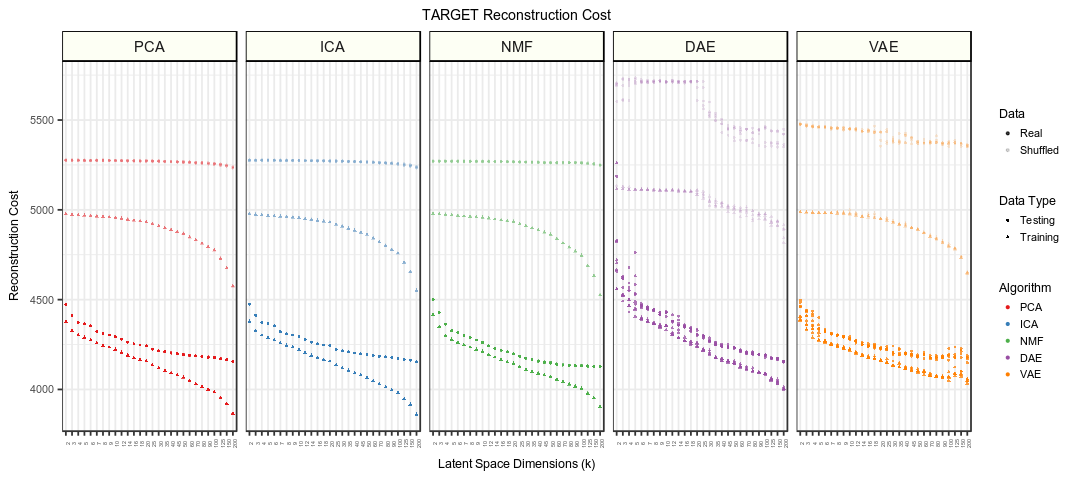

In [4]:
target_recon_gg <- plot_reconstruction_loss(target_recon_cost_df)

target_path <- file.path(base_dir, paste0("reconstruction_cost_", dataset))

save_png_pdf(p = target_recon_gg,
             path_prefix = target_path,
             height = 70,
             width = 170)

target_recon_gg

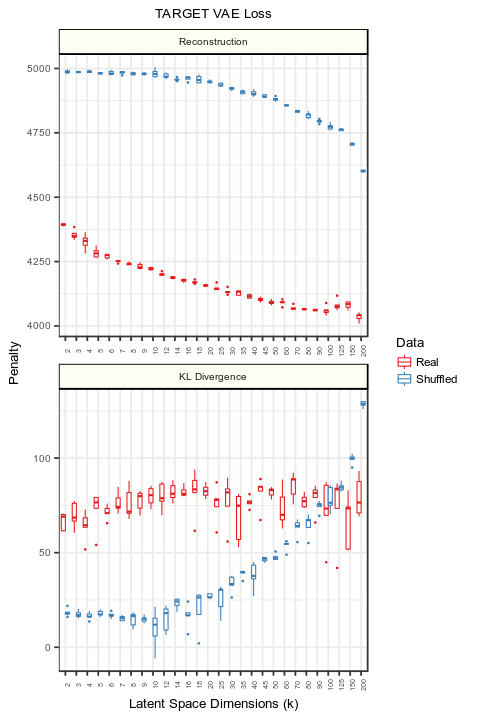

In [5]:
# Compile VAE specific reconstruction loss
target_vae_recon_cost_df <- compile_reconstruction_data(dataset, data_focus = "vae")

target_vae_loss_gg <- plot_vae_training(target_vae_recon_cost_df)

target_path <- file.path(base_dir, paste0("vae_training_reconstruction_", dataset))

save_png_pdf(p = target_vae_loss_gg,
             path_prefix = target_path,
             height = 130,
             width = 100)

target_vae_loss_gg

## TCGA Reconstruction Results

In [6]:
# Define the dataset to compile results for
dataset <- 'TCGA'
base_dir <- file.path("figures", dataset)

tcga_recon_cost_df <- compile_reconstruction_data(dataset)
recon_file <- file.path("results", paste0("reconstruction_", dataset, ".tsv"))

# Write results to file
readr::write_tsv(tcga_recon_cost_df, path = recon_file)

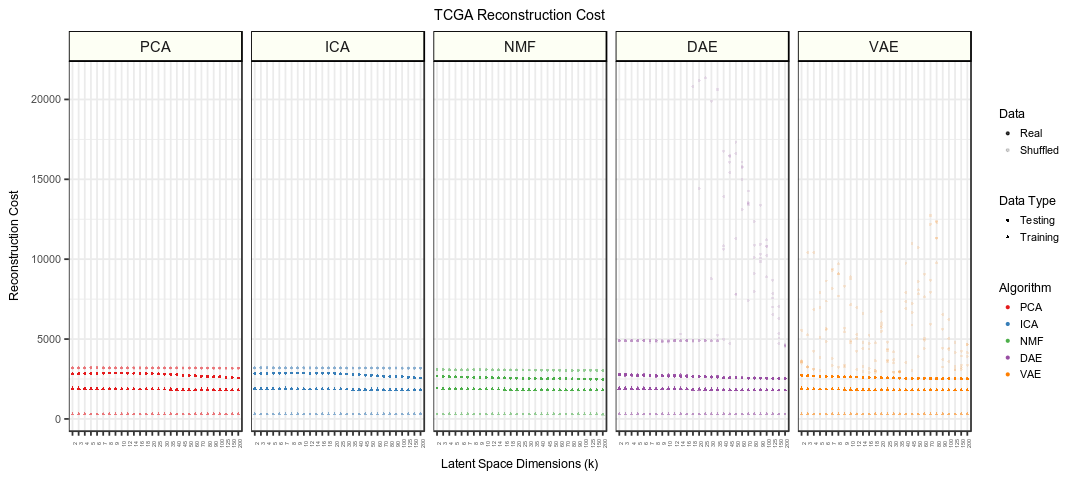

In [7]:
tcga_recon_gg <- plot_reconstruction_loss(tcga_recon_cost_df)

tcga_path <- file.path(base_dir, paste0("reconstruction_cost_", dataset))

save_png_pdf(p = tcga_recon_gg,
             path_prefix = tcga_path,
             height = 70,
             width = 170)

tcga_recon_gg

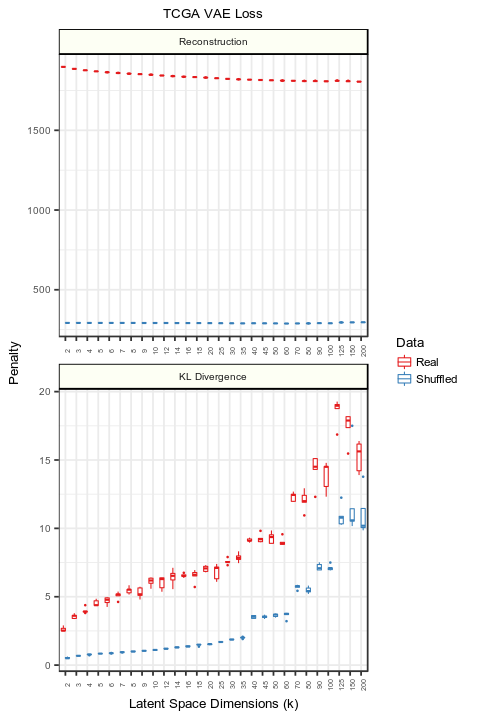

In [8]:
# Compile VAE specific reconstruction loss
tcga_vae_recon_cost_df <- compile_reconstruction_data(dataset, data_focus = "vae")

tcga_vae_loss_gg <- plot_vae_training(tcga_vae_recon_cost_df)

tcga_path <- file.path(base_dir, paste0("vae_training_reconstruction_", dataset))

save_png_pdf(p = tcga_vae_loss_gg,
             path_prefix = tcga_path,
             height = 130,
             width = 100)

tcga_vae_loss_gg

## Filter TCGA Results to Iterations that Converged

In [9]:
# Subset to iterations that may have converged
tcga_recon_cost_df <- tcga_recon_cost_df %>% dplyr::filter(reconstruction_cost < 4000)

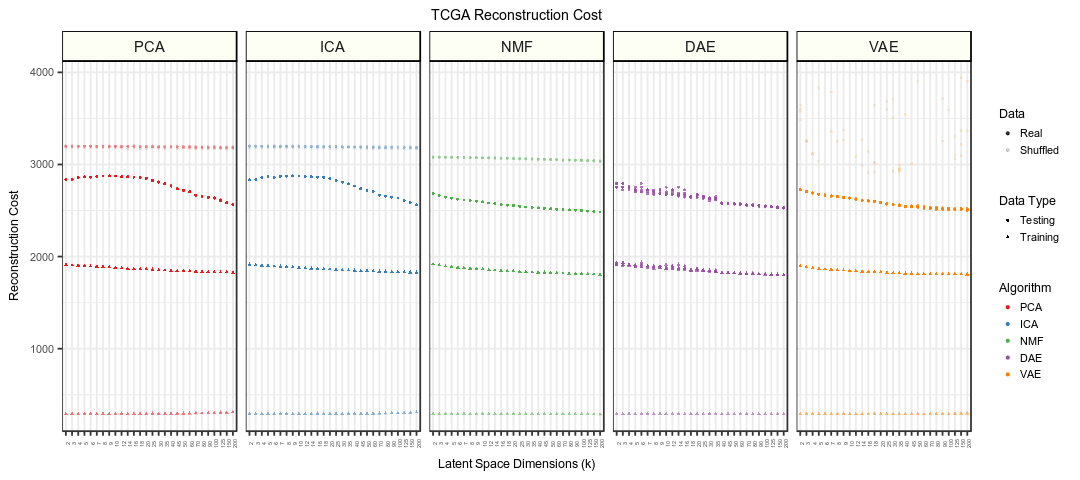

In [10]:
tcga_recon_filter_gg <- plot_reconstruction_loss(tcga_recon_cost_df)

tcga_path <- file.path(base_dir, paste0("reconstruction_cost_subset_converge_", dataset))

save_png_pdf(p = tcga_recon_filter_gg,
             path_prefix = tcga_path,
             height = 70,
             width = 170)

tcga_recon_filter_gg

In [11]:
# Subset to testing non-shuffled data
tcga_recon_cost_df <- tcga_recon_cost_df %>%
    dplyr::filter(data_type == 'testing', shuffled == 'False')

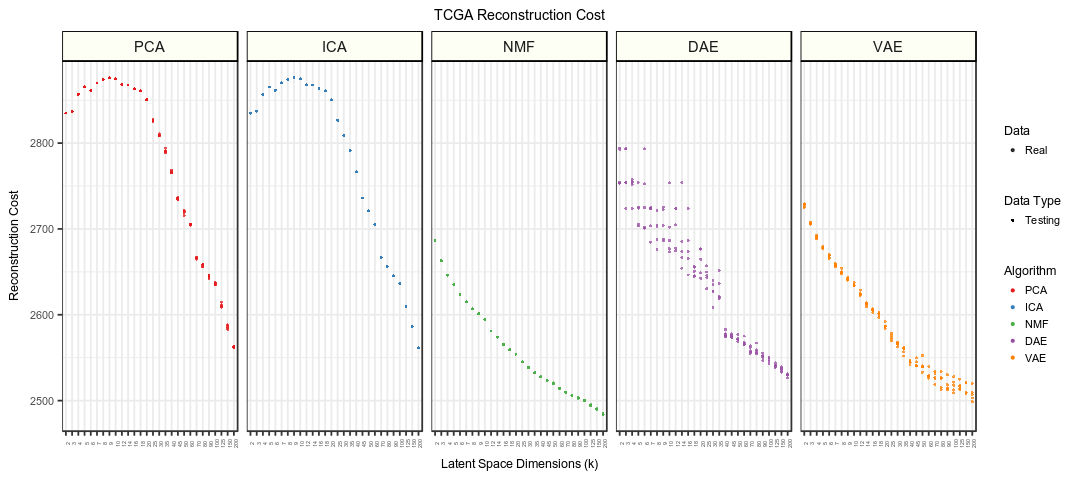

In [12]:
tcga_recon_filter_test_gg <- plot_reconstruction_loss(tcga_recon_cost_df)

tcga_path <- file.path(base_dir, paste0("reconstruction_cost_subset_converge_testing_", dataset))

save_png_pdf(p = tcga_recon_filter_test_gg,
             path_prefix = tcga_path,
             height = 70,
             width = 170)

tcga_recon_filter_test_gg

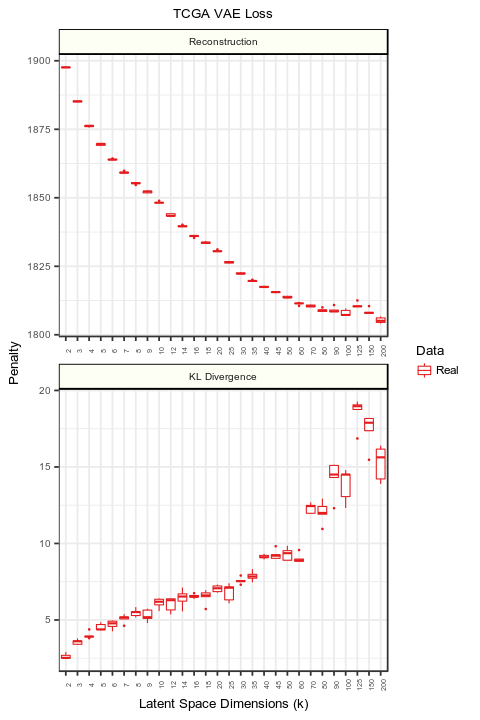

In [13]:
# Remove shuffled data and replot
tcga_vae_recon_cost_df <- tcga_vae_recon_cost_df %>% dplyr::filter(shuffle == "False")

tcga_vae_loss_filter_test_gg <- plot_vae_training(tcga_vae_recon_cost_df)

tcga_path <- file.path(base_dir, paste0("vae_training_reconstruction_subset_converge_", dataset))

save_png_pdf(p = tcga_vae_loss_filter_test_gg,
             path_prefix = tcga_path,
             height = 130,
             width = 100)

tcga_vae_loss_filter_test_gg

## GTEx Reconstruction Results

In [14]:
# Define the dataset to compile results for
dataset <- "GTEX"
base_dir <- file.path("figures", dataset)

gtex_recon_cost_df <- compile_reconstruction_data(dataset)

recon_file <- file.path("results", paste0("reconstruction_", dataset, ".tsv"))

# Write results to file
readr::write_tsv(gtex_recon_cost_df, path = recon_file)

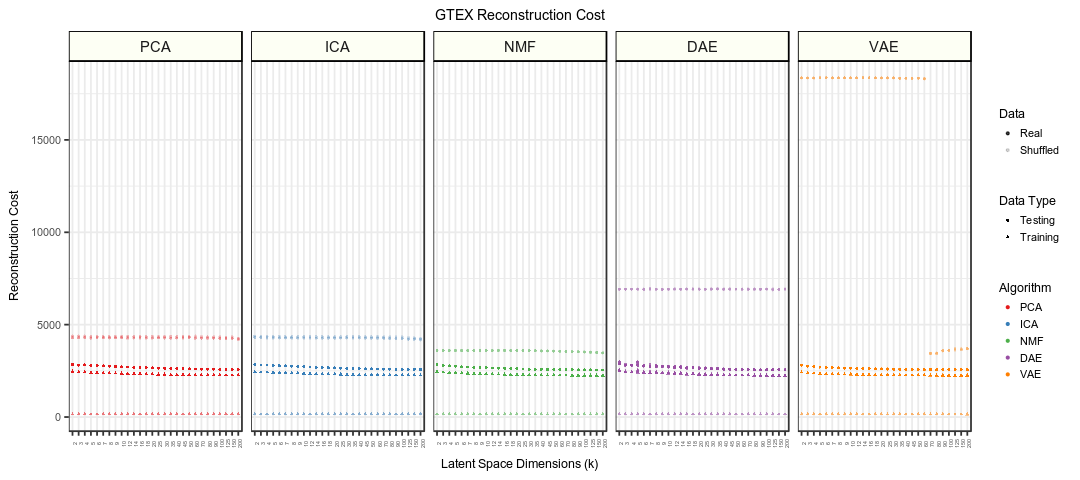

In [15]:
gtex_recon_gg <- plot_reconstruction_loss(gtex_recon_cost_df)

gtex_path <- file.path(base_dir, paste0("reconstruction_cost_", dataset))

save_png_pdf(p = gtex_recon_gg,
             path_prefix = gtex_path,
             height = 70,
             width = 170)

gtex_recon_gg

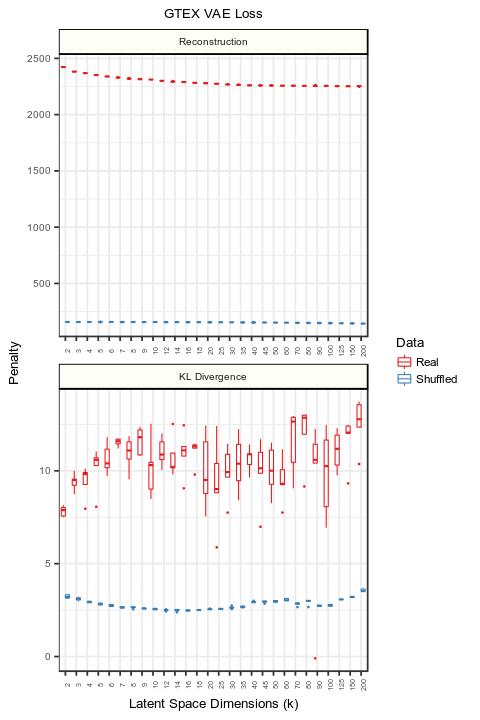

In [16]:
# Define the dataset to compile results for
gtex_vae_recon_cost_df <- compile_reconstruction_data(dataset, data_focus = "vae")

gtex_vae_loss_gg <- plot_vae_training(gtex_vae_recon_cost_df)

gtex_path <- file.path(base_dir, paste0("vae_training_reconstruction_", dataset))

save_png_pdf(p = gtex_vae_loss_gg,
             path_prefix = gtex_path,
             height = 130,
             width = 100)

gtex_vae_loss_gg

## Filter GTEx Results

In [17]:
# Subset to iterations that may have converged
gtex_recon_cost_df <- gtex_recon_cost_df %>% dplyr::filter(reconstruction_cost < 5000)

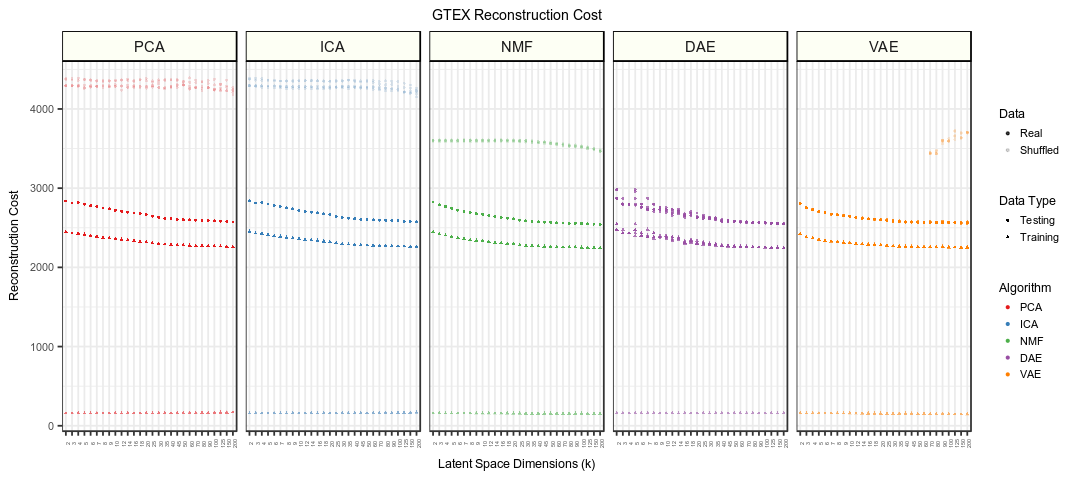

In [18]:
gtex_recon_filter_gg <- plot_reconstruction_loss(gtex_recon_cost_df)

gtex_path <- file.path(base_dir, paste0("reconstruction_cost_subset_converge_", dataset))

save_png_pdf(p = gtex_recon_filter_gg,
             path_prefix = gtex_path,
             height = 70,
             width = 170)

gtex_recon_filter_gg

In [19]:
# Subset to testing non-shuffled data
gtex_recon_cost_df <- gtex_recon_cost_df %>%
    dplyr::filter(data_type == 'testing', shuffled == 'False')

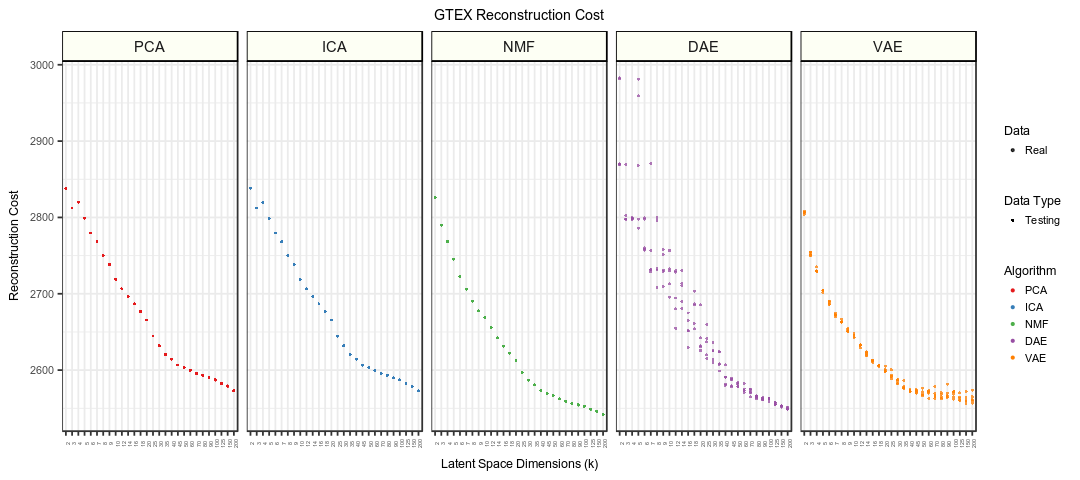

In [20]:
gtex_recon_filter_test_gg <- plot_reconstruction_loss(gtex_recon_cost_df)

gtex_path <- file.path(base_dir, paste0("reconstruction_cost_subset_converge_testing_", dataset))

save_png_pdf(p = gtex_recon_filter_test_gg,
             path_prefix = gtex_path,
             height = 70,
             width = 170)

gtex_recon_filter_test_gg

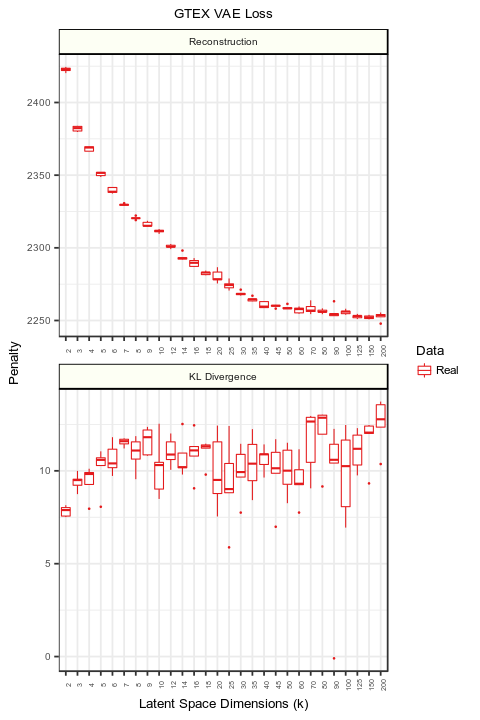

In [21]:
# Remove shuffled data and replot
gtex_vae_recon_cost_df <- gtex_vae_recon_cost_df %>% dplyr::filter(shuffle == "False")

gtex_vae_loss_filter_test_gg <- plot_vae_training(gtex_vae_recon_cost_df)

gtex_path <- file.path(base_dir, paste0("vae_training_reconstruction_subset_converge_", dataset))

save_png_pdf(p = gtex_vae_loss_filter_test_gg,
             path_prefix = gtex_path,
             height = 130,
             width = 100)

gtex_vae_loss_filter_test_gg

## Create Supplementary Figure Describing Algorithm Loss across Dimensions

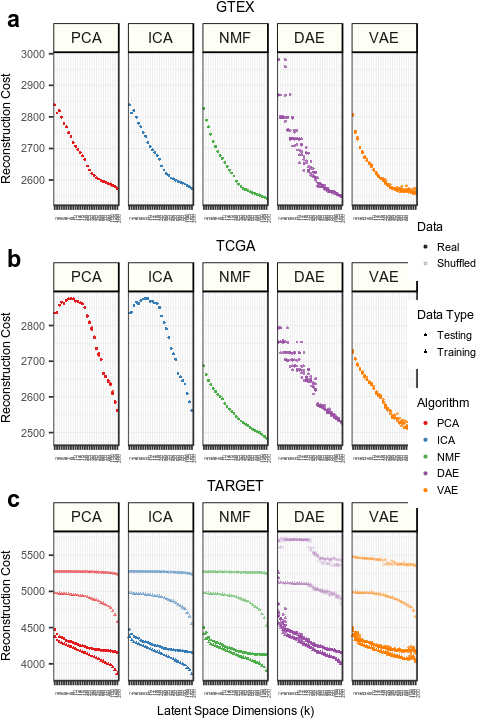

In [22]:
legend <- get_legend(target_recon_gg) 

main_plot <- (
    cowplot::plot_grid(
        gtex_recon_filter_test_gg + ggtitle('GTEX') + xlab('') +
            theme(plot.margin = margin(t = 0.5, r = 0.2, b = 0, l = 0.4),
                  legend.position = "none",
                  panel.grid.major = element_line(size = 0.25),
                  panel.grid.minor = element_line(size = 0.175)),
        tcga_recon_filter_test_gg + ggtitle('TCGA') + xlab('') +
            theme(plot.margin = margin(t = 0, r = 0.2, b = 0, l = 0.4),
                  legend.position = "none",
                  panel.grid.major = element_line(size = 0.25),
                  panel.grid.minor = element_line(size = 0.175)),
        target_recon_gg + ggtitle('TARGET') +
            theme(plot.margin = margin(t = 0, r = 0.2, b = 0.3, l = 0.4),
                  legend.position = "none",
                  panel.grid.major = element_line(size = 0.25),
                  panel.grid.minor = element_line(size = 0.175)),
        labels = c("a", "b", "c"),
        ncol = 1,
        nrow = 3
    )
)

main_plot = cowplot::plot_grid(main_plot, legend, rel_widths = c(1, 0.15), ncol = 2)
main_plot

In [23]:
main_path <- file.path("figures", "reconstruction_summary")

save_png_pdf(p = main_plot,
             path_prefix = main_path,
             height = 130,
             width = 170)